# Import Libraries

In [1]:
import numpy as np
import keras
import tensorflow
import random
from tensorflow.keras import Input,Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from sklearn.metrics import confusion_matrix

# Load and PreProcess MNIST Data

In [2]:
num_classes = 10
input_shape = [28,28,1]

# Making Canny Edges for MNIST data

In [3]:
### load the mnist_data
(train_x,train_y),(test_x,test_y) = mnist.load_data()

# train_x = train_x.astype('float32')/255
# test_x = test_x.astype('float32')/255

train_x_canny = train_x.copy()
test_x_canny  = test_x.copy()

train_x_canny = cv2.GaussianBlur(train_x_canny, (21,21), 1)
test_x_canny = cv2.GaussianBlur(test_x_canny, (21,21), 1)

train_x_canny = cv2.bitwise_not(train_x_canny)
test_x_canny = cv2.bitwise_not(test_x_canny)

for index in range(len(train_x_canny)):
    train_x_canny[index] = (train_x_canny[index] * 255).astype(np.uint8)
    train_x_canny[index] = cv2.Canny(train_x_canny[index], 50, 200)
    
train_x_canny = np.expand_dims(train_x_canny,-1)
    
    
for index in range(len(test_x_canny)):
    test_x_canny[index] = (test_x_canny[index] * 255).astype(np.uint8)
    test_x_canny[index] = cv2.Canny(test_x_canny[index], 50, 200)  

test_x_canny = np.expand_dims(test_x_canny,-1)

print(train_x_canny.shape,test_x_canny.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [4]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()


train_x = train_x.astype('float32')/255
test_x = test_x.astype('float32')/255

print(train_x.shape,test_x.shape)

train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x,-1)

print(train_x.shape,test_x.shape)

train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y,num_classes)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [17]:
test_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
import matplotlib.pyplot as plt

def display_sample_normal(num):
    #print label
    print("[0  1  2  3  4  5  6  7  8  9]")
    #print the one hot array of this sample's label
    # print(train_labels[num])
    #print label converted back to a number
    
    label = train_y[num].argmax(axis=0)
    #Reshape the 768 values to a 29X28 image
    image = train_x[num].reshape([28,28])
    plt.title(f'Sample {num} label {label}')
    plt.imshow(image,cmap = 'gray')
    plt.show()


In [19]:
def display_sample_canny(num):
    #print label
    print("[0  1  2  3  4  5  6  7  8  9]")
    #print the one hot array of this sample's label
    # print(train_labels[num])
    #print label converted back to a number
    
    label = train_y[num].argmax(axis=0)
    #Reshape the 768 values to a 29X28 image
    image = train_x_canny[num]
    plt.title(f'Sample {num} label {label}')
    plt.imshow(image,cmap='gray')
    plt.show()
    # cv2.imshow("Canny",image)
    # cv2.waitKey(0)


[0  1  2  3  4  5  6  7  8  9]


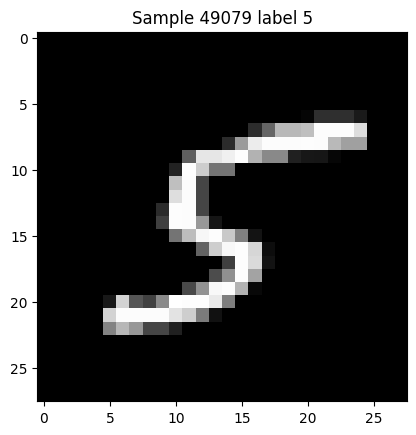

[0  1  2  3  4  5  6  7  8  9]


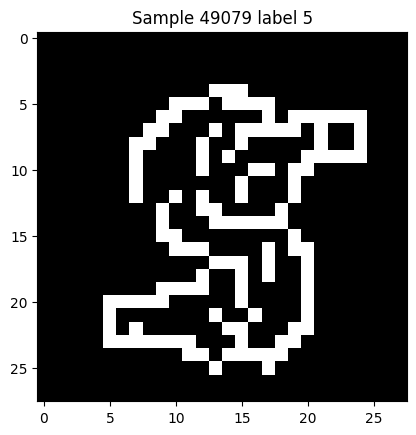

In [20]:
num = random.randint(0,59999)
display_sample_normal(num)
display_sample_canny(num)

In [8]:
# cv2.imshow("num_0",train_x_canny[0])
# cv2.imshow("canny",train_x[0])

# cv2.waitKey(0)

In [9]:
test_image = train_x[0].copy()
test_image= (test_image * 255).astype(np.uint8)

# Apply Canny edge detection
edges = cv2.Canny(test_image, 100, 200)  # Adjust threshold values as needed
print(edges.shape)
edges = np.expand_dims(edges,-1)
edges.shape

(28, 28)


(28, 28, 1)

In [10]:
# cv2.imshow("canny",edges)
# cv2.waitKey(0)

# Build Model

In [11]:
inpx = Input(shape = (28,28,1))
layer1 = Conv2D(32, kernel_size = (3,3), activation = 'relu')(inpx)
layer2 = Conv2D(64, (3,3), activation = 'relu')(layer1)
layer3 = MaxPooling2D(pool_size = (3,3))(layer2)

### To prevent overfitting
layer4 = Dropout(0.5)(layer3)

layer5 = Flatten()(layer4)
layer6 = Dense(250, activation = 'sigmoid')(layer5)
layer7 = Dense(10,  activation = 'softmax')(layer6)

# Compile and Fit

In [12]:
model = Model([inpx],layer7)
early_stop = EarlyStopping(monitor='val_loss', patience = 3, verbose=1)
model.compile(optimizer = "adam",
              loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'],
              )
model.fit(train_x, train_y, epochs = 100, batch_size = 32, callbacks = [early_stop], validation_data = (test_x,test_y), verbose = 2)

Epoch 1/100
1875/1875 - 186s - loss: 0.1499 - accuracy: 0.9553 - val_loss: 0.0448 - val_accuracy: 0.9856 - 186s/epoch - 99ms/step
Epoch 2/100
1875/1875 - 184s - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0343 - val_accuracy: 0.9888 - 184s/epoch - 98ms/step
Epoch 3/100
1875/1875 - 180s - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0314 - val_accuracy: 0.9900 - 180s/epoch - 96ms/step
Epoch 4/100
1875/1875 - 185s - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0250 - val_accuracy: 0.9918 - 185s/epoch - 99ms/step
Epoch 5/100
1875/1875 - 180s - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0279 - val_accuracy: 0.9899 - 180s/epoch - 96ms/step
Epoch 6/100
1875/1875 - 181s - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0248 - val_accuracy: 0.9917 - 181s/epoch - 97ms/step
Epoch 7/100
1875/1875 - 179s - loss: 0.0206 - accuracy: 0.9930 - val_loss: 0.0305 - val_accuracy: 0.9907 - 179s/epoch - 96ms/step
Epoch 8/100
1875/1875 - 184s - loss: 0.0187 - accuracy: 0.9936 - val_loss: 0.0228 - val_ac

In [13]:
# Accuracy on Test Datas

In [14]:
score=model.evaluate(test_x,test_y,verbose=0)
print('Test loss: ',score[0])
print('Test Accuracy: ',score[1])

Test loss:  0.024227136746048927
Test Accuracy:  0.9925000071525574


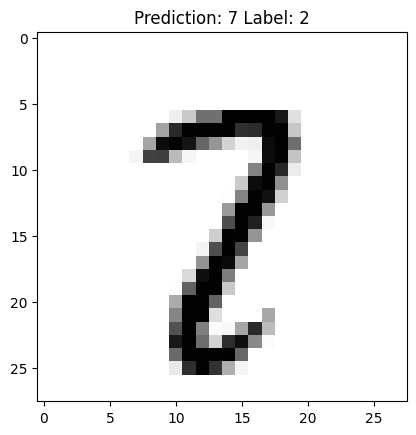

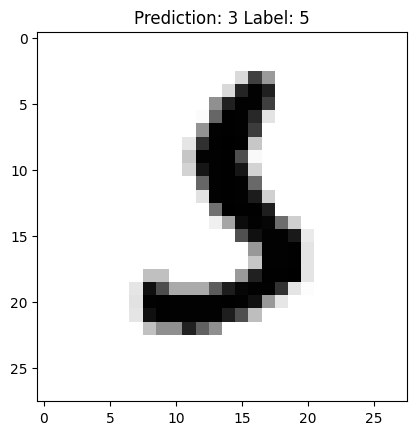

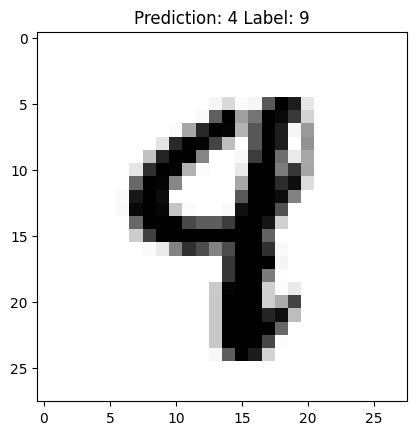

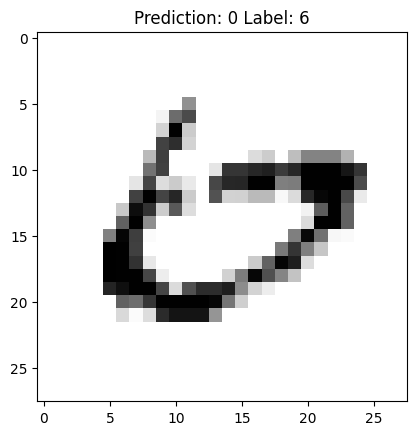

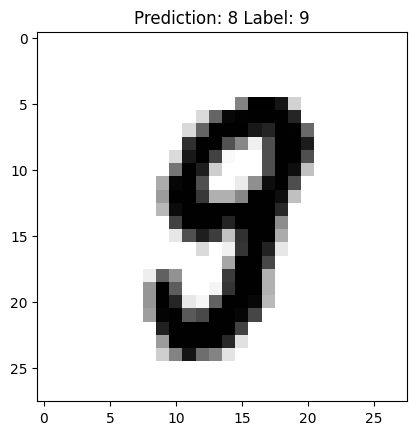

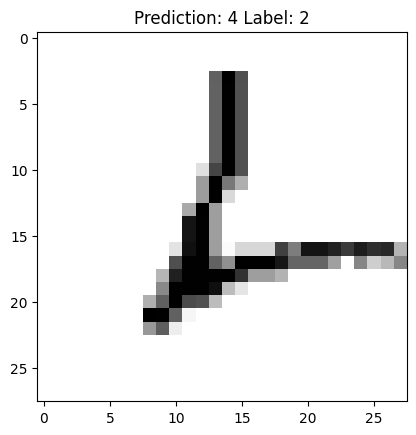

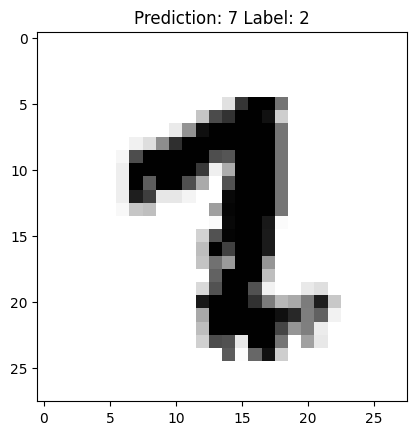

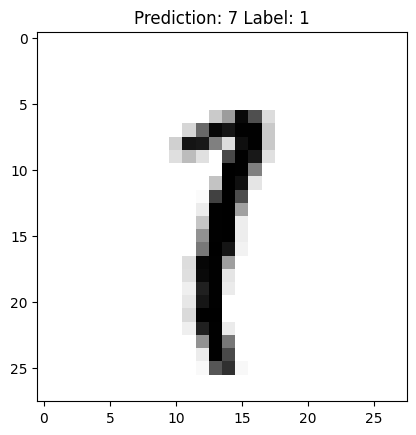

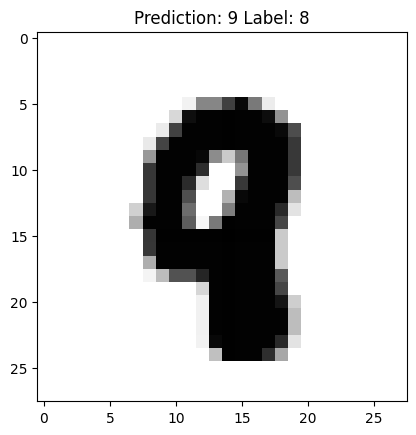

In [21]:
#lets visualize where our NN had challenges and gone wrong
for x in range(1000):
    test_image=test_x[x].reshape(1,28,28)
    test_image=test_image.astype('float32')
    predicted_cat=model.predict(test_image,verbose=0).argmax()
    label=test_y[x].argmax()
    if(predicted_cat != label):
        plt.title('Prediction: %d Label: %d' %(predicted_cat,label))
        plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()

In [22]:
from tensorflow.keras.models import save_model,load_model

In [23]:
save_model(model,"english_mnist.h5")

In [24]:
load_model = load_model("english_mnist.h5")

In [26]:
load_model